<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/fruits_shape_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 2.2MB/s 


In [ ]:
from pyunpack import Archive
Archive('/content/drive/My Drive/Test_data.rar').extractall('/content/drive/My Drive/test_fruits')

In [2]:
import os 
import cv2
import glob
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import array 
import matplotlib.pyplot as plt
import pandas as pd

/content/drive/My Drive/trái cây/109972996_203975961007417_388567466305601180_n.jpg


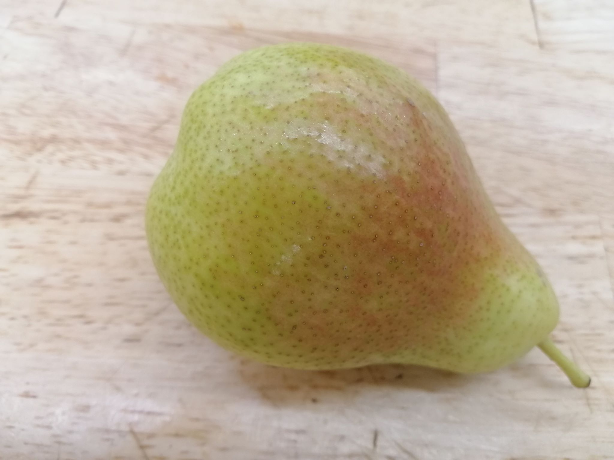

/content/drive/My Drive/trái cây/109786166_281386616453999_4662139962497007658_n.jpg


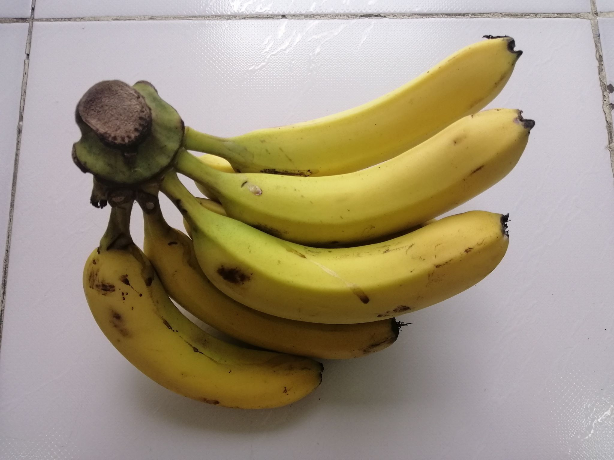

/content/drive/My Drive/trái cây/110103412_962884174177138_3559852675323525931_n.jpg


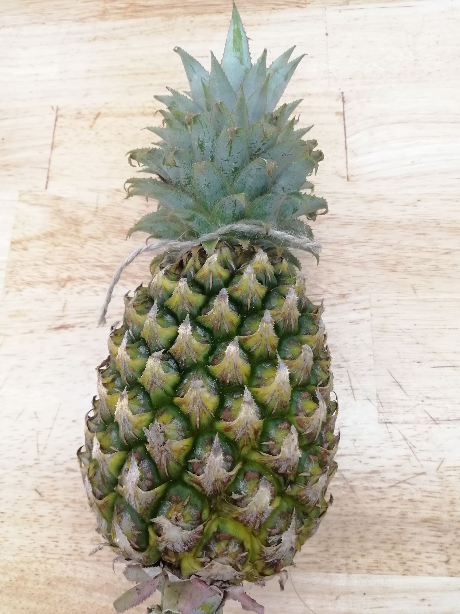

/content/drive/My Drive/trái cây/109912846_207473563946243_6416850486686074001_n.jpg


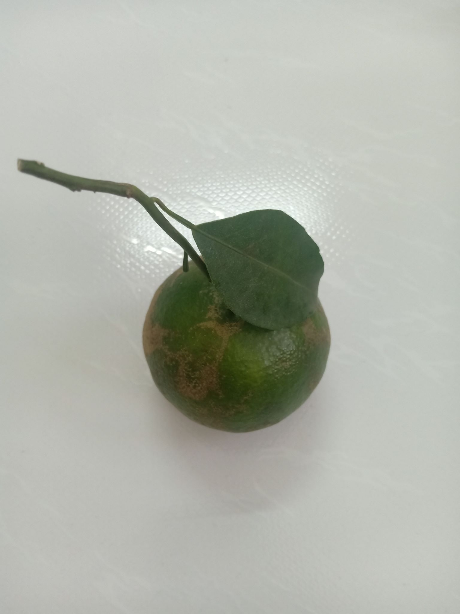

/content/drive/My Drive/trái cây/110242238_284379889339328_1963237088047757672_n.jpg


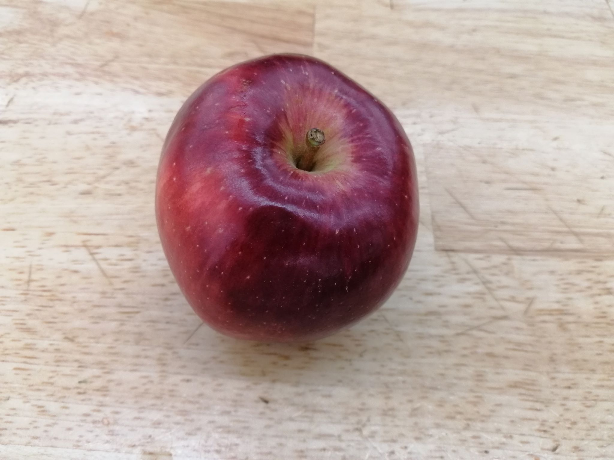

/content/drive/My Drive/trái cây/110273520_3275408422684526_8027461503006292062_n.jpg


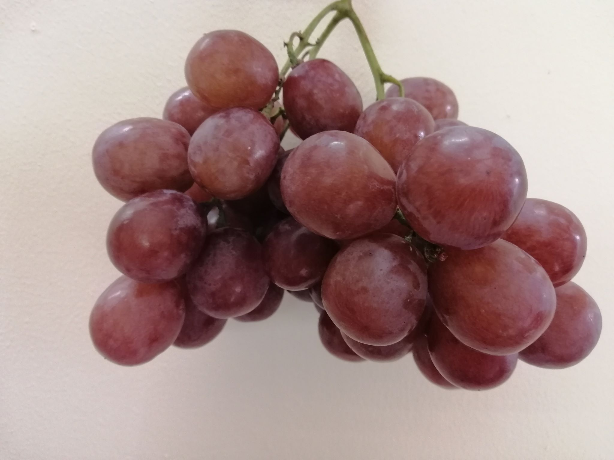

/content/drive/My Drive/trái cây/110336319_2365533633586358_1895377760748940923_n.jpg


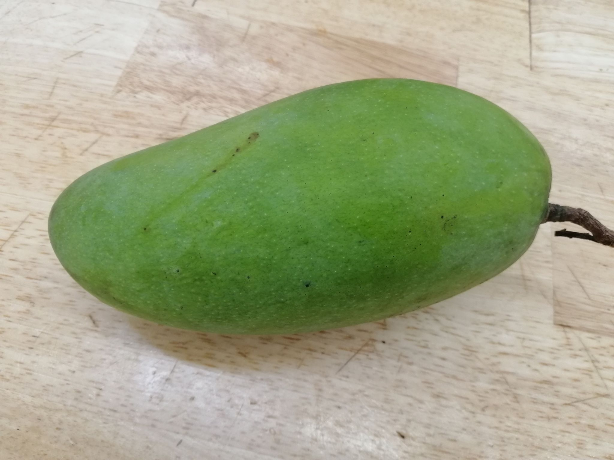

/content/drive/My Drive/trái cây/109907077_763783367724395_7416488679330226310_n.jpg


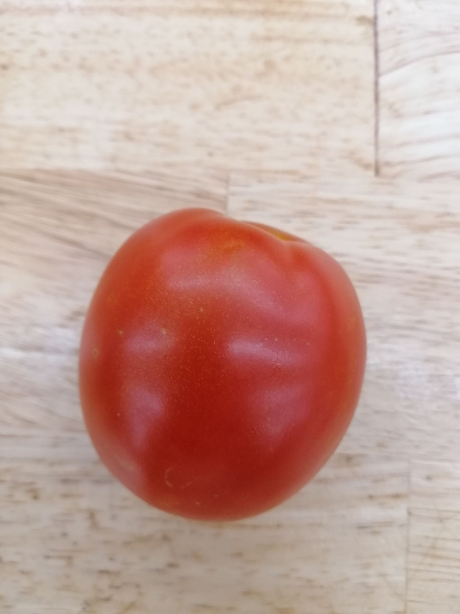

In [81]:
path = glob.glob("/content/drive/My Drive/trái cây/*.jpg")
scale_percent = 30
image= []
for name in path:
  file = cv2.imread(name, cv2.IMREAD_UNCHANGED)
  width = int(file.shape[1] * scale_percent / 100)
  height = int(file.shape[0] * scale_percent / 100)
  dim = (width, height)
  file = cv2.resize(file, dim)
  image.append (file)
  print (name)
  cv2_imshow(file)

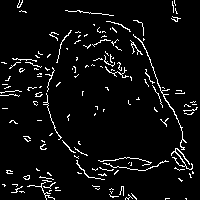

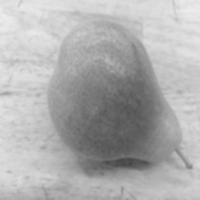

In [82]:
resized = cv2.resize (image[0], (200,200))
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(3,3),0)
edge = cv2.Canny(blur, 70 , 50)
cv2_imshow(edge)
cv2_imshow(blur)

In [83]:
edge.shape

(200, 200)

In [54]:
path = glob.glob("/content/drive/My Drive/test_fruits/Test_data"+"/**")
dataset = {}
fruit = []
for f_path in path:
    f_name = str(f_path)[46:]
    fruit.append(f_name)
    print (f_name)
    folder = glob.glob(f_path + "/*.jpg")
    image = []
    for f in folder:
        img = cv2.imread (f, cv2.IMREAD_UNCHANGED)
        img = cv2.resize (img, (200, 200))
        #cv2_imshow(img)
        image.append(img)
        print (len(image))
    dataset[f_name] = image

chuoi
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
cachua
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
cam
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [56]:
len (dataset['cachua'])

21

In [57]:
name = []
for f_name in dataset:
    for img in dataset[f_name]:
        name.append(f_name)

In [58]:
print (name)
len(name)
from collections import Counter
Counter(name)

['chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'chuoi', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cachua', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam', 'cam']


Counter({'cachua': 21, 'cam': 21, 'chuoi': 21})

In [59]:
def features_grid(img):
    features = np.array([], dtype='uint8')
    section = 1
    
    for y in range(0, img.shape[0], 40):
        for x in range(0, img.shape[1], 40):
            
            # Cropping the image into a section.
            section_img = img[y:y+40, x:x+40]
            
            # Claculating the mean and stdev of the sectioned image.
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)
            
            # Appending the above calculated values into features array.
            features = np.append(features, [section_mean, section_std])
    
    # Returning the features array.
    return features

In [60]:
all_imgs = np.zeros((1, 50), dtype='uint8')

progress_counter = 0
name = []
section_mean = []
section_std = []
for fruits in dataset: 
    for img in dataset[fruits]:

        resized = cv2.resize (img, (200,200))
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray,(3,3),0)
        edge = cv2.Canny(blur, 70 , 50)

        img_features = features_grid(img)
        img_features = img_features.reshape(1, img_features.shape[0])

        all_imgs = np.append(all_imgs, img_features, axis=0)
        progress_counter += 1
        name.append (fruits)

all_imgs = all_imgs[1:]

In [61]:
len(name)

63

In [62]:
all_imgs.shape

(63, 50)

In [63]:
feature_name = []
section = 1
for y in range(0, 200, 40):
    for x in range(0, 200, 40):
        feature_name.append(f"sec{section}_mean")
        feature_name.append(f"sec{section}_std")
        section += 1

In [64]:
feature_name[:10]

['sec1_mean',
 'sec1_std',
 'sec2_mean',
 'sec2_std',
 'sec3_mean',
 'sec3_std',
 'sec4_mean',
 'sec4_std',
 'sec5_mean',
 'sec5_std']

In [65]:
ftb = pd.DataFrame(all_imgs, columns= feature_name)
print (ftb.shape)
name_col = name
ftb.insert(loc = 0, column = "Fruits", value= name_col)
ftb.head()

(63, 50)


,Fruits,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
0,chuoi,181.062292,25.273885,204.472708,22.175289,225.454375,18.298634,194.398958,48.496179,186.941042,37.886976,138.020625,60.710603,113.137917,69.976113,158.686458,62.872969,131.514375,58.621439,181.847917,42.525313,150.487708,55.107224,78.756250,58.822652,121.812500,65.396434,118.729375,60.541965,186.369375,29.121334,152.761458,43.494607,61.197292,38.978798,59.350833,45.775319,115.749375,48.783569,184.784375,5.124814,162.831250,7.927632,104.587500,34.956947,95.121667,34.443840,139.026458,20.573677,178.418542,9.402528
1,chuoi,181.123750,13.737544,199.000833,11.553318,199.637083,39.016881,214.089375,11.031986,198.516250,15.810919,179.302708,15.681180,181.557292,26.025894,135.542292,56.084823,195.572292,24.188974,196.022917,11.506461,162.213750,39.935711,119.561042,59.581244,99.988958,60.856772,171.163750,42.505317,190.668125,3.851902,146.238542,42.513272,113.148750,61.949929,127.585625,60.797068,168.537500,33.648766,186.692083,2.835522,151.938958,23.471610,104.755625,46.909786,104.191458,33.298183,169.681458,11.545345,186.238125,8.303473
2,chuoi,172.101042,21.767503,182.833125,25.448556,192.982500,4.206159,205.818958,25.583693,224.388542,21.952431,160.755625,37.861855,102.853333,55.051178,142.471667,55.100023,147.004375,49.043567,215.933542,31.181838,140.542917,51.707271,107.851875,63.254924,80.252083,55.267235,119.869792,59.748653,210.903958,9.442840,105.813125,43.953596,134.310625,64.568836,146.918958,61.189976,155.735000,53.737237,202.224167,5.964806,98.948750,21.129370,112.109583,41.328200,135.807500,53.266660,172.962917,38.648063,195.856667,5.485917
3,chuoi,147.139375,12.543954,100.668958,53.730169,164.207083,8.934229,173.208333,4.672697,169.837292,13.424045,148.916042,36.214791,92.094792,46.853699,105.594792,38.895434,138.817292,34.028752,178.272500,6.008285,177.896458,32.244694,138.383750,56.519862,138.044792,64.048080,148.246042,62.101487,171.708750,40.775275,197.699167,4.527545,201.446875,18.628744,193.475000,37.673817,199.646875,17.341295,195.003125,4.146961,206.784792,8.552591,214.771250,11.395036,210.162708,7.017536,203.898750,3.688518,196.694792,8.720974
4,chuoi,161.797708,4.612135,154.993333,11.992322,111.723958,30.072355,92.016875,54.815060,85.910417,42.748780,172.209167,6.180817,135.501458,27.043067,96.977083,51.895872,130.858333,61.250843,179.863958,22.995888,188.407500,5.870032,146.459792,44.932232,122.889167,58.611946,166.449167,50.641924,192.630625,4.994374,197.284167,5.501485,162.260000,56.754316,115.359583,58.272827,136.969167,55.763618,196.482500,16.093791,210.303958,10.966403,216.609583,24.918377,197.261042,44.531244,194.203958,35.403529,192.916458,26.569239


In [80]:
ftb.shape

(63, 51)

In [68]:
ftb = ftb.sample(frac=1)
ftb.head(10)

,Fruits,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
21,cachua,213.996042,8.323222,209.217500,8.214810,206.745625,8.473272,203.851667,9.464940,208.592917,10.966735,205.924792,11.771787,193.448958,22.817078,171.276667,35.981339,196.506875,20.818260,199.677917,10.674757,204.928333,10.772373,162.765208,42.988270,142.397500,36.356515,158.411667,45.662217,205.720417,11.604640,203.175833,9.249275,167.330000,43.770693,100.353542,49.125297,169.047708,55.447479,208.028542,7.247170,214.807292,10.993225,210.091458,13.809574,173.143125,30.006071,189.274375,12.449478,189.083750,12.621578
28,cachua,197.278333,12.941730,208.911875,8.856068,205.796042,9.417751,200.343750,11.640490,205.665625,8.286112,195.991042,7.995840,198.444792,35.229573,144.404375,35.777531,182.724375,37.974236,200.040417,10.867614,190.229375,8.357487,151.023125,49.194365,113.444583,42.171340,148.064583,41.190846,198.097292,9.771148,184.711250,10.456156,172.876458,31.673167,106.750625,42.635193,151.217292,35.690470,187.965625,10.187956,171.906875,15.247632,181.868125,8.172993,177.833750,10.069770,171.822500,12.498340,176.107500,12.037031
31,cachua,213.157500,9.023060,202.015417,8.259980,199.026667,8.220384,202.060208,7.148770,206.016875,9.510276,207.762083,9.415438,190.548958,30.986746,135.161458,42.293951,163.217708,48.170620,192.937708,10.143968,196.797292,7.422008,160.262917,49.422785,91.108542,51.891285,115.782083,62.294596,185.042917,10.810712,195.159375,8.356099,171.314792,33.578159,69.545000,50.830524,135.261250,54.382883,188.633542,9.307439,202.197917,8.579238,194.110000,10.744029,177.313125,20.945119,186.988958,12.979073,194.867917,15.688559
49,cam,223.394792,5.934554,212.491250,23.049357,178.871667,42.084382,181.936250,16.563907,187.945417,15.877458,212.160417,7.814869,166.207083,70.801686,141.795417,71.727187,162.379167,47.169914,190.690625,12.429397,203.925417,12.157039,143.246042,71.175687,114.682708,72.371717,142.540417,58.092800,190.273125,12.557758,203.940208,12.054528,146.185417,52.713824,100.768125,55.300669,154.867083,34.186520,183.633958,13.488914,195.901667,14.437333,187.418333,16.097735,163.576250,28.874311,171.501250,12.855689,174.224792,15.028421
15,chuoi,186.588542,7.270837,180.959167,19.311536,157.598958,50.192751,195.514375,3.193190,197.578958,2.998127,178.773542,3.797391,141.539375,36.457905,153.125208,61.010241,200.188958,2.970677,201.643542,3.113716,169.779583,4.714534,130.213125,35.132668,129.743542,63.339267,201.442500,12.964134,210.062083,9.482874,157.006250,5.123594,150.884375,16.462133,104.521458,46.454785,165.812500,51.649228,214.126458,11.431191,149.310625,5.703834,155.915833,4.621282,171.787500,8.350515,193.827917,5.272054,208.844167,9.928132
61,cam,203.505625,14.501637,193.343125,34.053224,182.395000,55.724679,188.989375,42.909489,202.714583,15.554226,196.501667,15.908030,169.812083,59.786067,147.347292,72.089013,137.353750,71.164032,196.219792,27.828534,216.071667,11.303294,157.695417,69.941253,115.724375,71.834712,101.790833,63.574703,178.165000,31.233060,209.307708,11.767279,165.987500,48.745421,102.048958,63.144612,115.050417,52.501841,186.941250,16.415436,202.174167,13.959990,174.096458,20.333041,131.179167,35.218555,166.124375,36.212937,213.613333,15.413214
18,chuoi,185.356250,7.104353,187.506458,10.137018,173.305000,38.644689,192.992500,11.889033,196.572708,5.068091,177.969375,4.206703,143.411458,34.891171,164.853750,58.400966,199.473542,4.080509,200.826042,5.436638,166.409583,5.611164,110.130417,35.818543,166.277500,56.425147,199.955208,3.305720,210.031875,12.269000,152.30

In [69]:
labels = ftb['Fruits']
feature = ftb.drop(['Fruits'], axis=1)

In [70]:
feature.head()

,sec1_mean,sec1_std,sec2_mean,sec2_std,sec3_mean,sec3_std,sec4_mean,sec4_std,sec5_mean,sec5_std,sec6_mean,sec6_std,sec7_mean,sec7_std,sec8_mean,sec8_std,sec9_mean,sec9_std,sec10_mean,sec10_std,sec11_mean,sec11_std,sec12_mean,sec12_std,sec13_mean,sec13_std,sec14_mean,sec14_std,sec15_mean,sec15_std,sec16_mean,sec16_std,sec17_mean,sec17_std,sec18_mean,sec18_std,sec19_mean,sec19_std,sec20_mean,sec20_std,sec21_mean,sec21_std,sec22_mean,sec22_std,sec23_mean,sec23_std,sec24_mean,sec24_std,sec25_mean,sec25_std
21,213.996042,8.323222,209.217500,8.214810,206.745625,8.473272,203.851667,9.464940,208.592917,10.966735,205.924792,11.771787,193.448958,22.817078,171.276667,35.981339,196.506875,20.818260,199.677917,10.674757,204.928333,10.772373,162.765208,42.988270,142.397500,36.356515,158.411667,45.662217,205.720417,11.604640,203.175833,9.249275,167.330000,43.770693,100.353542,49.125297,169.047708,55.447479,208.028542,7.247170,214.807292,10.993225,210.091458,13.809574,173.143125,30.006071,189.274375,12.449478,189.083750,12.621578
28,197.278333,12.941730,208.911875,8.856068,205.796042,9.417751,200.343750,11.640490,205.665625,8.286112,195.991042,7.995840,198.444792,35.229573,144.404375,35.777531,182.724375,37.974236,200.040417,10.867614,190.229375,8.357487,151.023125,49.194365,113.444583,42.171340,148.064583,41.190846,198.097292,9.771148,184.711250,10.456156,172.876458,31.673167,106.750625,42.635193,151.217292,35.690470,187.965625,10.187956,171.906875,15.247632,181.868125,8.172993,177.833750,10.069770,171.822500,12.498340,176.107500,12.037031
31,213.157500,9.023060,202.015417,8.259980,199.026667,8.220384,202.060208,7.148770,206.016875,9.510276,207.762083,9.415438,190.548958,30.986746,135.161458,42.293951,163.217708,48.170620,192.937708,10.143968,196.797292,7.422008,160.262917,49.422785,91.108542,51.891285,115.782083,62.294596,185.042917,10.810712,195.159375,8.356099,171.314792,33.578159,69.545000,50.830524,135.261250,54.382883,188.633542,9.307439,202.197917,8.579238,194.110000,10.744029,177.313125,20.945119,186.988958,12.979073,194.867917,15.688559
49,223.394792,5.934554,212.491250,23.049357,178.871667,42.084382,181.936250,16.563907,187.945417,15.877458,212.160417,7.814869,166.207083,70.801686,141.795417,71.727187,162.379167,47.169914,190.690625,12.429397,203.925417,12.157039,143.246042,71.175687,114.682708,72.371717,142.540417,58.092800,190.273125,12.557758,203.940208,12.054528,146.185417,52.713824,100.768125,55.300669,154.867083,34.186520,183.633958,13.488914,195.901667,14.437333,187.418333,16.097735,163.576250,28.874311,171.501250,12.855689,174.224792,15.028421
15,186.588542,7.270837,180.959167,19.311536,157.598958,50.192751,195.514375,3.193190,197.578958,2.998127,178.773542,3.797391,141.539375,36.457905,153.125208,61.010241,200.188958,2.970677,201.643542,3.113716,169.779583,4.714534,130.213125,35.132668,129.743542,63.339267,201.442500,12.964134,210.062083,9.482874,157.006250,5.123594,150.884375,16.462133,104.521458,46.454785,165.812500,51.649228,214.126458,11.431191,149.310625,5.703834,155.915833,4.621282,171.787500,8.350515,193.827917,5.272054,208.844167,9.928132


In [71]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, labels, test_size=0.25)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(47, 50)
(16, 50)
(47,)
(16,)


In [74]:
models = []
models.append(('rfc', RandomForestClassifier()))
models.append(('svc', SVC()))
models.append(('knn', KNeighborsClassifier()))


for name, model in models:
  print(name)
  model.fit(X_train, Y_train)
  #print('\ttrain', accuracy_score(Y_train, Y_test))
  pred = model.predict(X_test)
  print('\ttest', accuracy_score(Y_test, pred))

rfc
	test 1.0
svc
	test 0.875
knn
	test 0.9375


In [77]:
def edge_extract(img):
  all_imgs = np.zeros((1, 50), dtype='uint8')

  progress_counter = 0

  resized = cv2.resize (img, (200,200))
  gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray,(3,3),0)
  edge = cv2.Canny(blur, 70 , 50)

  img_features = features_grid(img)
  img_features = img_features.reshape(1, img_features.shape[0])

  all_imgs = np.append(all_imgs, img_features, axis=0)
  progress_counter += 1
  all_imgs = all_imgs[1:]
  return all_imgs

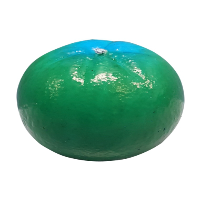

In [75]:
from skimage import io
img = io.imread("https://lh3.googleusercontent.com/proxy/0LJdDijPcYtTWPo0XWEmYSWNprcc6C2PzMcgJyYSMOqOiNa2fTrswM1C4nv39J2FvG-QvBELmNUv-pdjl645UmUHW-z2_tcaSgmOfp-oCvvO99cWlRQhQJI")
resized_img = cv2.resize(img, (200, 200))
cv2_imshow(resized_img)

In [78]:
df = pd.DataFrame(edge_extract(resized_img))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,255.0,0.0,254.995417,0.097787,254.582292,5.075174,254.995417,0.078924,255.0,0.0,226.131875,65.438686,137.872292,79.535847,131.574583,73.0461,145.508125,75.80255,227.154792,61.21499,158.793333,91.390186,71.513125,46.404218,79.042708,51.997084,85.255208,49.103913,161.949583,84.922148,229.919792,57.666336,91.353542,73.750049,57.232917,27.060409,99.580625,71.304214,229.817083,56.337327,255.0,0.0,255.0,0.0,250.554167,27.833485,255.0,0.0,255.0,0.0


In [79]:
for name, model in models:
  pred = model.predict(df)
  print(name, pred)

rfc ['cachua']
svc ['cachua']
knn ['cachua']
